# Import packages

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt

# Importing data


In [93]:
##Uploading the data
house_df=pd.read_csv('/content/drive/MyDrive/EnhanceIT/Aldo Cao Romero - raw_house_data.csv - Aldo Cao Romero - raw_house_data.csv.csv')
##Shape of the Data
print(house_df.shape)
##Observing the first 5 rows
house_df.head(5)


(5000, 16)


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-1.103.782,31.356.362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045.371,31.594.213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040.707,31.594.844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035.925,31.645.878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813.768,32.285.162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55


In [94]:
##Identifying data types
house_df.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude            object
latitude             object
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

# Locating None values

In [95]:
##We get a list of every column
columns=house_df.columns.values.tolist()
#Separate beteween cathegorical and numerical columns
numerical=[]
cathegorical=[]

for i in columns:
  if(house_df[i].dtype!="O"):
    numerical.append(i)
  else:
    cathegorical.append(i)

In [96]:
 for j in cathegorical:
   if(j!='longitude' and j!='latitude'):
    print(j+':')
    print( house_df[j].value_counts()["None"])
##Getting the number of None values in each categorical column

bathrooms:
6
sqrt_ft:
56
garage:
7
kitchen_features:
33
floor_covering:
1
HOA:
562


# Correct object numerical values

In [97]:
##In this case we have garage, bathrooms, HOA and sqrt_ft as object type variables when they are actually numbers.
#First, let's change the None values by zeros and transform the whoe columns into numbers
n=len(house_df['bathrooms'])
##Making a loop that makes all the work
#For batrooms we have
for i in range(n):
  if(house_df['bathrooms'][i]=='None'):
    house_df['bathrooms'][i]=0.0
house_df['bathrooms']=house_df['bathrooms'].astype(float)

#Sqrt_ft
for i in range(n):
  if(house_df['sqrt_ft'][i]=='None'):
    house_df['sqrt_ft'][i]=0.0
house_df['sqrt_ft']=house_df['sqrt_ft'].astype(float)

#Garage
for i in range(n):
  if(house_df['garage'][i]=='None'):
    house_df['garage'][i]=0
house_df['garage']=house_df['garage'].astype(float)

house_df['garage']=house_df['garage'].astype(int)

#HOA
for i in range(n):
  if(house_df['HOA'][i]=='None'):
    house_df['HOA'][i]=0
    #print(i)
  else:
   # print(i)
    vv=house_df['HOA'][i].split(',')
    house_df['HOA'][i]=house_df['HOA'][i][0]
house_df['HOA']=house_df['HOA'].astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying

In [98]:
#Also let's note that we have zero values data that most likely should not be zero.
r=0
n=len(house_df['year_built'])
for i in range(n):
   if(house_df['year_built'][i]==0.0):
     r=r+1
print(r)
k=0
for i in range(n):
   if(house_df['sold_price'][i]==0.0):
     k=k+1
print(k)
m=0
for i in range(n):
   if(house_df['HOA'][i]==0.0):
     k=k+1
print(k)

r=0
for i in range(n):
   if(house_df['sqrt_ft'][i]==0.0):
     r=r+1
print(r)
b=0
for i in range(n):
   if(house_df['bedrooms'][i]==0.0):
     b=b+1
print(b)
bb=0
for i in range(n):
   if(house_df['bathrooms'][i]==0.0):
     bb=bb+1
print(bb)


t=0
for i in range(n):
   if(house_df['taxes'][i]==0.0):
     t=t+1
print(t)
a=0
for i in range(n):
   if(house_df['lot_acres'][i]==0.0):
     a=a+1
print(a)

5
0
1388
56
0
6
22
35


In [99]:
##We opbserve that we don't have None or zero values in the bedrooms columns, so, it is not possible not having zero values for sqrt_ft
#To solve this, let's strack some statisitics
#For the HOA variable is clear that the mode is zero. We compute it anyway
mode=house_df['year_built'].mode()[0]
for i in range(n):
   if(house_df['year_built'][i]==0.0):
     house_df['year_built'][i]=mode
#For HOA
modeHOA=house_df['HOA'].mode()[0]
for i in range(n):
   if(house_df['HOA'][i]==0.0):
     house_df['HOA'][i]=mode


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [100]:
#We analizy some information on the sqrt_ft column to see if we can be able of choosing a value for the sqrt_ft different of zero
mean=house_df['sqrt_ft'].mean()
median=house_df['sqrt_ft'].median()
mode2=house_df['sqrt_ft'].mode()
print(mean)
print(median)
print(mode2)
#We observe how different is the media with the madianit seems they behave as a normal distribution

3674.7435200000004
3499.5
0    0.0
dtype: float64


In [101]:
#We use the mean to fill all the zero values for sqrt_ft
for i in range(n):
   if(house_df['sqrt_ft'][i]==0.0):
     house_df['sqrt_ft'][i]=mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Searching for Null/NaN values


In [102]:
#Searching for the total amount of NaN or Null values
house_df.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64

In [103]:
##We opbserve that we don't have Null or NaN values in the bedrooms columns, so, it is not possible not having zero values for sqrt_ft


In [104]:
#We eliminate all nun rows considerig they are less than 5% of the data
df_drop=house_df.dropna(axis=0)
df_drop.shape

(4973, 16)

# Dropping unnecesary values

In [105]:
#Let's analyse the MLS column
MLS_data=df_drop["MLS"]
vecMLS=np.unique(MLS_data)
print(len(vecMLS))
print(df_drop.shape)
#We see that both of them have the same length, so the variable MLS is unnecesary for the data analysis. We just dropp it
df_drop=df_drop.drop(['MLS'],axis=1)

4973
(4973, 16)


In [91]:
df_drop.head(5)

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,5300000.0,85637,-1.103.782,31.356.362,2154.00,5272.00,1941,13,10.0,10500.00000,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",2006
1,4200000.0,85646,-111.045.371,31.594.213,1707.00,10422.36,1997,2,2.0,7300.00000,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",2006
2,4200000.0,85646,-111.040.707,31.594.844,1707.00,10482.00,1997,2,3.0,3674.74352,0,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",2006
3,4500000.0,85646,-111.035.925,31.645.878,636.67,8418.58,1930,7,5.0,9019.00000,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",2006
4,3411450.0,85750,-110.813.768,32.285.162,3.21,15393.00,1995,4,6.0,6396.00000,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",5


# Correlated variables

,sold_price,zipcode,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
sold_price,1.000000,-0.047941,0.332954,0.023265,0.099163,0.114050,0.326405,0.524503,0.095537,0.384310,-0.050562
zipcode,-0.047941,1.000000,-0.128443,-0.001697,0.014823,0.040643,-0.056332,-0.007799,0.092184,-0.018166,-0.053586
lot_acres,0.332954,-0.128443,1.000000,-0.000569,-0.067181,0.069806,0.055510,0.107511,-0.070652,0.086382,0.087258
taxes,0.023265,-0.001697,-0.000569,1.000000,-0.004180,0.005146,0.008946,0.037633,0.005666,0.022548,-0.009001
year_built,0.099163,0.014823,-0.067181,-0.004180,1.000000,-0.183764,-0.051401,-0.057688,0.322810,-0.127501,-0.305000
bedrooms,0.114050,0.040643,0.069806,0.005146,-0.183764,1.000000,0.687501,0.548193,0.038145,0.145279,0.147353
bathrooms,0.326405,-0.056332,0.055510,0.008946,-0.051401,0.687501,1.000000,0.663811,0.097742,0.225633,0.082276
sqrt_ft,0.524503,-0.007799,0.107511,0.037633,-0.057688,0.548193,0.663811,1.000000,0.178561,0.406010,0.074676
garage,0.095537,0.092184,-0.070652,0.005666,0.322810,0.038145,0.097742,0.178561,1.000000,0.061073,-0.048304
fireplaces,0.384310,-0.018166,0.086382,0.022548,-0.127501,0.145279,0.225633,0.406010,0.061073,1.000000,0.036249


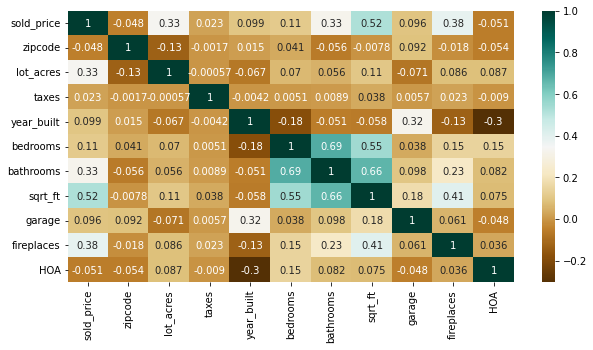

In [106]:
#Getting the correlation matrix of the data frame
plt.figure(figsize=(10,5))
c= df_drop.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
#There is a high correlation between the size of the house (sqrt_ft) and the sold price, as expected, also due to the amount of bathrooms. And the bathrooms are higly correlated to bedrooms

## Searching for outliers


(4973, 15)


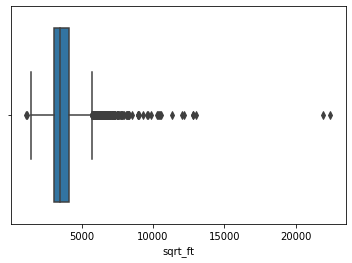

In [89]:
#Getting the box plots of all numerical variables
df=df_drop
print(df.shape)
sns.boxplot(x=df['sqrt_ft'])
#sns.boxplot(x=df['sold_price'])
#sns.boxplot(x=df['zipcode'])
#sns.boxplot(x=df['lot_acres'])
#sns.boxplot(x=df['taxes'])
#sns.boxplot(x=df['bedrooms'])
#sns.boxplot(x=df['year_built'])
#sns.boxplot(x=df['bathrooms'])
#sns.boxplot(x=df['garage'])
#sns.boxplot(x=df['fireplaces'])
plt.show()

In [40]:
##Getting an IQR analysis
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

sold_price    252500.00
zipcode           32.00
lot_acres          1.17
taxes           3283.00
year_built        19.00
bedrooms           1.00
bathrooms          1.00
sqrt_ft         1084.00
garage             1.00
fireplaces         2.00
HOA             2005.00
dtype: float64


In [108]:
df = df[~(df['fireplaces'] > 6)]
df.shape

(4961, 15)

In [109]:
#Based on the plots, we eliminate the significant outliers
df = df[~(df['garage'] > 15)]
df = df[~(df['bathrooms'] == 00)]
df = df[~(df['bathrooms'] > 20)]
df = df[~(df['bedrooms'] > 15)]
df = df[~(df['taxes'] ==0)]


In [59]:
df.shape

(4942, 17)

In [110]:
df = df[~(df['lot_acres'] > 500)]
df = df[~(df['lot_acres']==0)]
df = df[~(df['sold_price'] > 3000000)]
df = df[~(df['sqrt_ft'] >10000)]

In [61]:
#We get the final shape of the data
df.shape

(4889, 17)

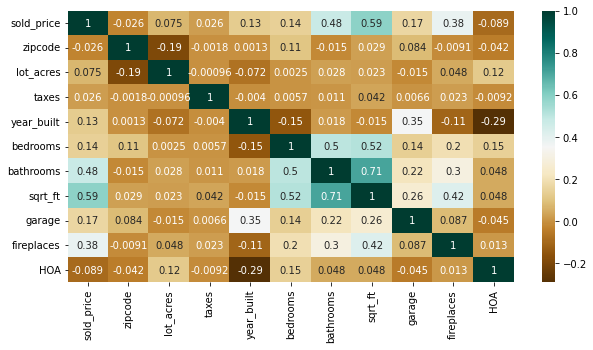

In [111]:
#Plotting in a heat map the correlation matrix once again we notice the following beahvior
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

# Encoding Kitchen features and floor covering


In [46]:
##We observe in the data, we have a lot of data in the kitchen features column. We need a way to have access to all of these features.
#Fisrt we select the kitchen column
features=df_drop['kitchen_features']
elements=[]
coder=[]
label=[]

##We loop over the total elements in the kitchn columns to extract the unique ones.
for i in features:
  el=i.lower().split(',')
  elements=elements+el

##Then we observe that existed elements with some descriptions, so we would need to add these descriptions 
for j in elements:
  if(':' in j):
    x=i.split(':')[0]
    label.append(x)
  else:
    label.append(j)
##In this way we construct our vector of unique kitchen items
label=np.unique(label)#This vector will be the base of the order of the coder's elements.

#Now, we create our vector of zeros and ones depending on the case. 
#If the house has the item it would be one and zero otherwise. Once again, depending on the labels list

for s in features:
  vec=np.zeros(len(label))
  ele=i.lower().split(',')
  for k in ele:
    if ':' in k:
      k=k.split(':')[0]
    for r in range(len(label)):
      if(label[r] ==k):
        vec[r]=1
  coder.append(vec)

##The order of the coder depends on the order of the label list
df_drop['kitchen coder']=coder

In [49]:
#Fisrt we select the floor_covering column
features=df_drop['floor_covering']
elements=[]
coder=[]
label=[]

##We loop over the total elements in the kitchn columns to extract the unique ones.
for i in features:
  el=i.lower().split(',')
  elements=elements+el

##Then we observe that exists elementes with the other feature, so we would need to add this other characteristic 
for j in elements:
  if(':' in j):
    x=i.split(':')[0]
    label.append(x)
  else:
    label.append(j)
##In this way we construct our vector of unique kitchen items
label=np.unique(label)
##print(label)

#Now, we create our vector of zeros and ones depending on the case. 
#If the house has the item it would be one and zero otherwise. Once again, depending on the label list

for s in features:
  vec=np.zeros(len(label))
  ele=i.lower().split(',')
  for k in ele:
    if ':' in k:
      k=k.split(':')[0]
    for r in range(len(label)):
      if(label[r] ==k):
        vec[r]=1
  coder.append(vec)

##The order of the coder depends on the order of the label list
df_drop['floor coder']=coder

In [50]:
df_drop.head(5)

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,kitchen coder,floor coder
0,5300000.0,85637,-1.103.782,31.356.362,2154.00,5272.00,1941,13,10.0,10500.0,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",2006,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
1,4200000.0,85646,-111.045.371,31.594.213,1707.00,10422.36,1997,2,2.0,7300.0,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",2006,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
2,4200000.0,85646,-111.040.707,31.594.844,1707.00,10482.00,1997,2,3.0,0.0,0,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",2006,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
3,4500000.0,85646,-111.035.925,31.645.878,636.67,8418.58,1930,7,5.0,9019.0,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",2006,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
4,3411450.0,85750,-110.813.768,32.285.162,3.21,15393.00,1995,4,6.0,6396.0,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
